## IMPORTS

In [1]:
import pandas as pd
import os
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from metrics.dataquality import calculate_data_quality_metrics
from metrics.dataquality import calculate_average_metrics
from metrics.overallscore import calculate_overall_score
from metrics.overallscore import calculate_overall_score_mom
from metrics.feature_calculations import calculate_unique_meter_count
from metrics.feature_calculations import calculate_metrics_by_month
from metrics.feature_calculations import calculate_blank_metrics
from metrics.datacollectorscore import calculate_quality_score_by_collector
from metrics.dataquality_data import calculate_validity
from metrics.dataquality_data import calculate_integrity

## READING DATA

In [2]:
start_time = datetime.now()

customers_2022 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2022.csv"), low_memory=False)
customers_2023_1 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_1.csv"), low_memory=False)
customers_2023_2 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_2.csv"), low_memory=False)
customers_2023_3 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_3.csv"), low_memory=False)
customers_2023_4 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_4.csv"), low_memory=False)
customers_2023_5 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_5.csv"), low_memory=False)
customers_2023_6 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_6.csv"), low_memory=False)
customers_2023_7 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_7.csv"), low_memory=False)
customers_2023_8 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_8.csv"), low_memory=False)
customers_2023_9 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_9.csv"), low_memory=False)
customers_2023_10 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_10.csv"), low_memory=False)
customers_2023_11 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_11.csv"), low_memory=False)
customers_2023_12 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2023_12.csv"), low_memory=False)
customers_2024_1 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2024_1.csv"), low_memory=False)
customers_2024_2 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2024_2.csv"), low_memory=False)
customers_2024_3 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2024_3.csv"), low_memory=False)
customers_2024_4 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2024_4.csv"), low_memory=False)
customers_2024_5 = pd.read_csv(os.path.expanduser("~/OneDrive/dev/data/ecg/dqm/ecg/updated/customers_2024_5.csv"), low_memory=False)

end_time = datetime.now()

# Calculate the duration
duration = end_time - start_time
duration_formatted = str(timedelta(seconds=duration.seconds))  # Convert to HH:MM:SS

print(f"Data loading completed in {duration_formatted}.")
print(f"Date: {datetime.now().strftime('%Y-%m-%d')}")

Data loading completed in 0:00:06.
Date: 2024-07-01


In [3]:
caims_data = pd.concat([
    customers_2022, 
    customers_2023_1, 
    customers_2023_2, 
    customers_2023_3, 
    customers_2023_4,
    customers_2023_5, 
    customers_2023_6, 
    customers_2023_7, 
    customers_2023_8, 
    customers_2023_9,
    customers_2023_10, 
    customers_2023_11, 
    customers_2023_12, 
    customers_2024_1, 
    customers_2024_2,
    customers_2024_3, 
    customers_2024_4,
    customers_2024_5
], ignore_index=True)

In [4]:
caims_data_x = caims_data[caims_data['is_on_board'] != 'Direct Connection']

In [5]:
column_mapping = {
    'slrn': 'SLRN',
    'ac_no': 'Account Number',
    'meter_number': 'Meter Number',
    'meter_status': 'Meter Status',
    'meter_slrn': 'Meter SLRN',
    'phone_number': 'Phone Number',
    'email': 'Email',
    'date': 'Date',
    'first_captured_username': 'First Captured Username',
    'updated_username': 'Updated Username'
}
data_x = caims_data_x.copy()
data_x.rename(columns=column_mapping, inplace=True)

In [6]:
filtered_data_ecg = data_x[data_x['SLRN'].fillna('').str.startswith('ECG')]

In [7]:
df = filtered_data_ecg.copy()

## METRICS

In [8]:
metrics_list = []

# Calculate metrics for each key field
key_fields = ['SLRN', 'Account Number', 'Meter Number', 'Meter SLRN', 'Phone Number', 'Email']

for field_name in key_fields:
    if field_name in df.columns:
        if field_name in ['SLRN', 'Account Number', 'Meter Number', 'Meter SLRN']:
            metrics = calculate_data_quality_metrics(df, field_name, 'ECGBD', 12, 'ECGCR', 11)
        elif field_name == 'Phone Number':
            metrics = calculate_data_quality_metrics(df, field_name, 'ECGBD', 12, 'ECGCR', 11)
        elif field_name == 'Email':
            metrics = calculate_data_quality_metrics(df, field_name, 'ECGBD', 12, 'ECGCR', 11)
        
        metrics_list.append(metrics)

# Calculate average completeness, validity, and integrity
average_completeness = calculate_average_metrics(metrics_list, 'Completeness')
average_validity = calculate_average_metrics(metrics_list, 'Validity')
average_integrity = calculate_average_metrics(metrics_list, 'Integrity')

# Calculate overall score using the overall_score function
overall_score = calculate_overall_score(average_completeness, average_validity, average_integrity)

total_caims_data = df['SLRN'].count()
print(f'\nSample Data: {total_caims_data:,}')

# Display the results
print("\nQuality Metrics for Each Field:")
for field_name in key_fields:
    if field_name in df.columns:
        print(f"\nMetrics for {field_name}:")
        print(f"Completeness: {metrics_list[key_fields.index(field_name)]['Completeness']:.2f}%")
        print(f"Validity: {metrics_list[key_fields.index(field_name)]['Validity']:.2f}%")
        print(f"Integrity: {metrics_list[key_fields.index(field_name)]['Integrity']:.2f}%")
        
        # Calculate and print the overall score for each field
        field_overall_score = calculate_overall_score(
            metrics_list[key_fields.index(field_name)]['Completeness'],
            metrics_list[key_fields.index(field_name)]['Validity'],
            metrics_list[key_fields.index(field_name)]['Integrity']
        )
        print(f"Overall Score: {field_overall_score:.2f}")

print("\nQuality Metrics - Average and Overall Score:")
print(f"Average Completeness: {average_completeness:.2f}%")
print(f"Average Validity: {average_validity:.2f}%")
print(f"Average Integrity: {average_integrity:.2f}%")
print(f"Overall Score: {overall_score:.2f}")



Sample Data: 1,563,148

Quality Metrics for Each Field:

Metrics for SLRN:
Completeness: 100.00%
Validity: 99.93%
Integrity: 99.96%
Overall Score: 99.96

Metrics for Account Number:
Completeness: 75.12%
Validity: 75.11%
Integrity: 74.87%
Overall Score: 75.03

Metrics for Meter Number:
Completeness: 99.72%
Validity: 99.24%
Integrity: 99.24%
Overall Score: 99.40

Metrics for Meter SLRN:
Completeness: 98.11%
Validity: 98.00%
Integrity: 98.10%
Overall Score: 98.07

Metrics for Phone Number:
Completeness: 79.87%
Validity: 71.72%
Integrity: 71.70%
Overall Score: 74.43

Metrics for Email:
Completeness: 29.83%
Validity: 1.03%
Integrity: 1.03%
Overall Score: 10.63

Quality Metrics - Average and Overall Score:
Average Completeness: 80.44%
Average Validity: 74.17%
Average Integrity: 74.15%
Overall Score: 76.25


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year Month'] = df['Date'].dt.to_period('M')
df['date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df["date"] = df.date.astype(str)
df["year_month"] = df.date.str[0:7]
df["year_month"] = df.year_month.str.replace('-', '')
df["year_month"] = df.year_month.apply(lambda x: int(x) if str(x).isdigit() else 0)

In [10]:
# Compute unique meter count
unique_meter_count_df = calculate_unique_meter_count(df, 'Year Month', 'Meter Number')


# Calculate overall data quality score on a monthly basis and link it back to the DataFrame
mom_overall_score = calculate_overall_score_mom(df)
mom_overall_score_fil = mom_overall_score[mom_overall_score['year_month'] >= 202305]
mom_overall_score_fil = mom_overall_score_fil[['Year Month', 'Overall Score', 'year_month']]
mom_overall_score_fil = mom_overall_score_fil.sort_values(by='year_month', ascending=True)
mom_overall_score_fil = mom_overall_score_fil.drop_duplicates(subset=['Year Month'])

mom_overall_score_fil = pd.merge(mom_overall_score_fil, unique_meter_count_df, on='Year Month', how='left')

In [14]:
# def calculate_blank_metrics(df, key_fields):
#     result_data = []

#     for year_month in df['Year Month'].unique():
#         # Filter the DataFrame for the current year_month
#         df_month = df[df['Year Month'] == year_month]
        
#         # Calculate metrics for the current month
#         metrics_list = []

#         for field_name in key_fields:
#             if field_name in df.columns:
#                 total_records = len(df_month)
#                 blanks = df_month[field_name].isnull().sum()
#                 blank_percentage = (blanks / total_records) * 100

#                 metrics = {
#                     'Year Month': year_month,
#                     'Field': field_name,
#                     'Total Records': total_records,
#                     'Blanks': blanks,
#                     'Blank Percentage': blank_percentage
#                 }
                
#                 metrics_list.append(metrics)

#         result_data.extend(metrics_list)

#     # Convert the list of dictionaries to a DataFrame
#     result_df = pd.DataFrame(result_data)
#     result_df = result_df.sort_values(by='Year Month', ascending=True)
    
#     return result_df

In [11]:
key_fields = ['Account Number', 'Phone Number', 'Email']

blank_analysis_data = df.copy()
blank_metrics_df = calculate_blank_metrics(blank_analysis_data, key_fields)

blank_metrics_df


Year Month           Field  Total Records  Blanks  Blank Percentage
0     2022-08  Account Number          10453     686          6.562709
1     2022-08    Phone Number          10453     315          3.013489
2     2022-08           Email          10453    3922         37.520329
3     2022-09  Account Number          23008    1524          6.623783
4     2022-09    Phone Number          23008    1226          5.328581
..        ...             ...            ...     ...               ...
60    2024-04  Account Number          64542    9292         14.396827
62    2024-04           Email          64542   63962         99.101360
64    2024-05    Phone Number          89858   27019         30.068553
63    2024-05  Account Number          89858    9870         10.983997
65    2024-05           Email          89858   89335         99.417971

[66 rows x 5 columns]

C:\Users\Moshood\AppData\Local\Temp\ipykernel_21576\2999179704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metrics_df.loc[:, 'Year Month'] = filtered_metrics_df['Year Month'].astype(str)


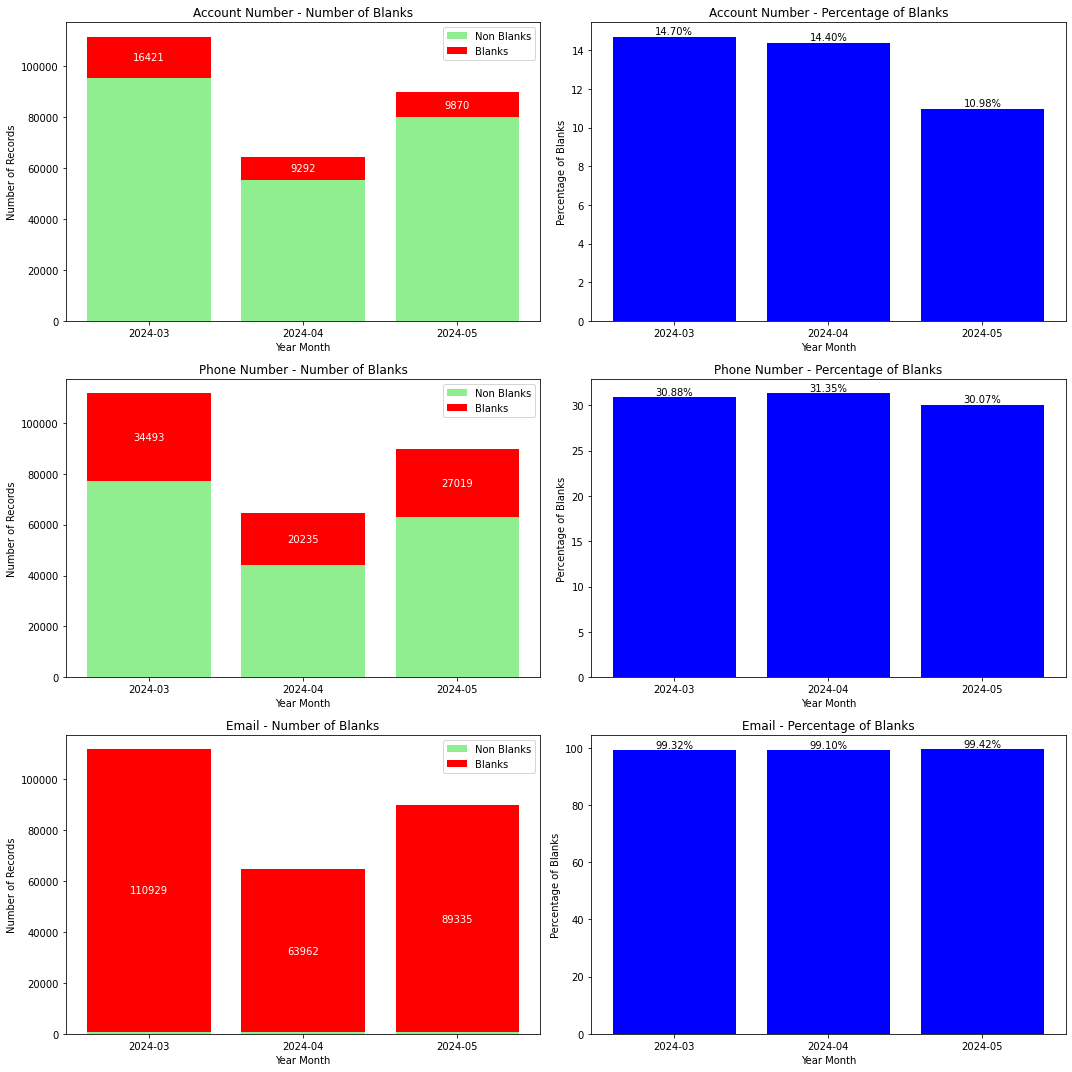

In [12]:
# Filter the last 3 months of data
plot_data = blank_metrics_df.copy()
last_3_months = plot_data['Year Month'].unique()[-3:]
filtered_metrics_df = plot_data[plot_data['Year Month'].isin(last_3_months)]

# Convert 'Year Month' to string for plotting
filtered_metrics_df.loc[:, 'Year Month'] = filtered_metrics_df['Year Month'].astype(str)

# Plotting the data
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

fields = ['Account Number', 'Phone Number', 'Email']
for i, field in enumerate(fields):
    field_data = filtered_metrics_df[filtered_metrics_df['Field'] == field]
    
    # Plot number of blanks as 100% stacked column chart
    total_records = field_data['Total Records']
    blanks = field_data['Blanks']
    non_blanks = total_records - blanks

    bars_non_blanks = axes[i, 0].bar(field_data['Year Month'], non_blanks, label='Non Blanks', color='lightgreen')
    bars_blanks = axes[i, 0].bar(field_data['Year Month'], blanks, bottom=non_blanks, label='Blanks', color='red')
    
    axes[i, 0].set_title(f'{field} - Number of Blanks')
    axes[i, 0].set_xlabel('Year Month')
    axes[i, 0].set_ylabel('Number of Records')
    axes[i, 0].legend()

    for bar in bars_blanks:
        height = bar.get_height()
        axes[i, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{int(height)}', ha='center', va='center', color='white')

    # Plot percentage of blanks
    axes[i, 1].bar(field_data['Year Month'], field_data['Blank Percentage'], color='blue')
    axes[i, 1].set_title(f'{field} - Percentage of Blanks')
    axes[i, 1].set_xlabel('Year Month')
    axes[i, 1].set_ylabel('Percentage of Blanks')
    for x, y in zip(field_data['Year Month'], field_data['Blank Percentage']):
        axes[i, 1].text(x, y, f'{y:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
blank_metrics_df.to_csv('data/exports/monthly_blank_metrics.csv', index=False)


## MOM CHART

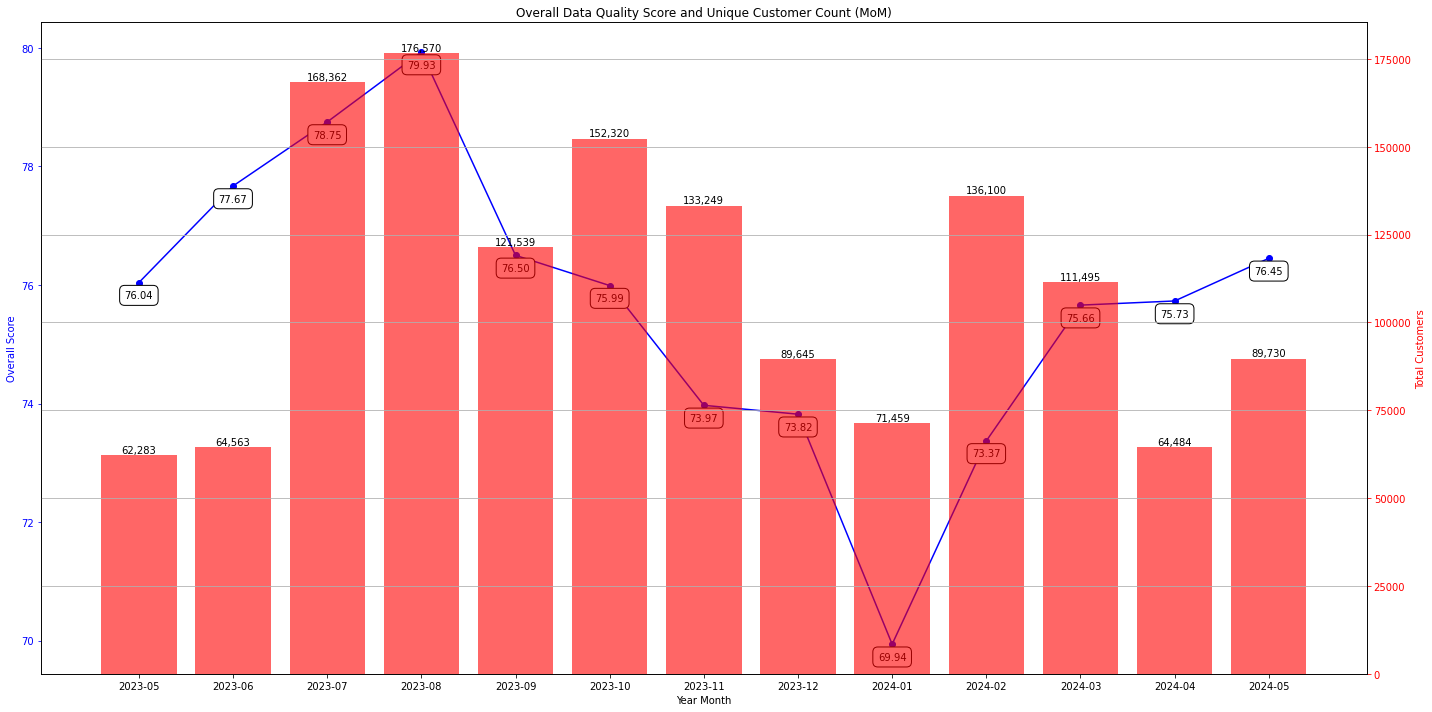

In [14]:
import matplotlib.pyplot as plt

# Plot overall data quality score on a MoM basis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot the overall score on the primary y-axis
ax1.plot(mom_overall_score_fil['Year Month'].astype(str), mom_overall_score_fil['Overall Score'].round(2), marker='o', linestyle='-', color='b', label='Overall Score')
ax1.set_xlabel('Year Month')
ax1.set_ylabel('Overall Score', color='b')
ax1.tick_params('y', colors='b')

# Text annotations with adjusted positions
for i, (x, y) in enumerate(zip(mom_overall_score_fil['Year Month'].astype(str), mom_overall_score_fil['Overall Score'].round(2))):
    ax1.text(x, y - 0.30, f'{y:.2f}', ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'), zorder=10)

# Secondary y-axis for the count of unique meter numbers
ax2 = ax1.twinx()
bars = ax2.bar(mom_overall_score_fil['Year Month'].astype(str), mom_overall_score_fil['Unique Meter Count'], alpha=0.6, color='red', label='Unique Meter Count')
ax2.set_ylabel('Total Customers', color='r')
ax2.tick_params('y', colors='r')

# Adding labels on the bar chart with MoM figures
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', va='bottom', ha='center')

# Plot chart
plt.title('Overall Data Quality Score and Unique Customer Count (MoM)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


### CALCULATE METRICS BY MONTH

In [15]:
key_fields = ['SLRN', 'Account Number', 'Meter Number', 'Meter SLRN', 'Phone Number', 'Email']

mom_data_quality_metrics = calculate_metrics_by_month(
    df, 
    key_fields, 
    bd_slrn='ECGBD', 
    bdslrn_len=12, 
    meter_slrn='ECGCR', 
    mslrn_len=11
)


In [16]:
mom_data_quality_metrics

Year Month      Key fields  Completeness    Validity  Integrity  \
0      2022-08            SLRN    100.000000   99.990433  99.751268   
1      2022-08  Account Number     93.437291   93.437291  92.021429   
2      2022-08    Meter Number     98.344973   98.239740  98.239740   
3      2022-08      Meter SLRN     97.225677   96.737779  97.225677   
4      2022-08    Phone Number     96.986511   77.661915  77.604515   
..         ...             ...           ...         ...        ...   
126    2024-05            SLRN    100.000000  100.000000  99.998887   
127    2024-05  Account Number     89.016003   89.016003  89.005987   
128    2024-05    Meter Number     99.989984   99.978856  99.978856   
129    2024-05      Meter SLRN     99.188720   99.188720  99.188720   
131    2024-05           Email      0.582029    0.579804   0.579804   

     Average Completeness  Average Validity  Average Integrity  Overall Score  \
0               91.412354         77.953698          77.749609      82.371887   
1               91.412354         77.953698          77.749609      82.371887   
2               91.412354         77.953698          77.749609      82.371887   
3               91.412354         77.953698          77.749609      82.371887   
4               91.412354         77.953698          77.749609      82.371887   
..                    ...               ...                ...            ...   
126             76.451364         76.448396          76.446542      76.448767   
127             76.451364         76.448396          76.446542      76.448767   
128             76.451364         76.448396          76.446542      76.448767   
129             76.451364         76.448396          76.446542      76.448767   
131             76.451364         76.448396          76.446542      76.448767   

     Unique Meter Count  
0                 10266  
1                 10266  
2                 10266  
3                 10266  
4                 10266  
..                  ...  
126               89730  
127               89730  
128               89730  
129               89730  
131               89730  

[132 rows x 10 columns]

In [29]:
import datetime

current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

csv_file_name = f'data/exports/mom_metrics_{current_datetime}.csv'

mom_data_quality_metrics.to_csv(csv_file_name, index=False)

In [14]:
# jan_df = df[df['Date'] > '2023-12-31']
# dec_df = df[df['year_month'] == 202312]

In [15]:
# dec_df.to_csv('dec_df.csv', index=False)

## QUALITY SCORE BY DATA COLLECTOR

In [16]:
df_x = df[df['year_month'] >= 202311]

field_metrics = ['SLRN', 'Account Number', 'Meter Number', 'Meter SLRN', 'Phone Number', 'Email']

collector_scores = calculate_quality_score_by_collector(df_x, field_metrics)

collector_scores


c:\Users\Moshood\OneDrive\dev\analysis\data_quality_management\metrics\dataquality.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed Meter Number'] = df[field_name].apply(preprocess_meter_number)
c:\Users\Moshood\OneDrive\dev\analysis\data_quality_management\metrics\dataquality.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meter Number Validity'] = df['Processed Meter Number'].apply(is_valid_meter_number)
c:\Users\Moshood\OneDrive\dev\analysis\data_quality_management\metrics\data

Average Completeness Average Validity Average Integrity  \
RolandA                  40.00%           40.00%            40.00%   
CharlesA                 36.97%           36.97%            36.97%   
AMYThomas                35.76%           35.76%            35.76%   
Ellen                    40.00%           33.33%            33.33%   
KwameA                   40.00%           33.33%            33.33%   
...                         ...              ...               ...   
DacostaA                 23.64%           23.64%            23.64%   
BenjaminA                22.05%           22.05%            22.05%   
SamuelBlay               21.95%           21.95%            21.95%   
Saeed                    20.00%           20.00%            20.00%   
Sotex                     6.67%            0.00%             0.00%   

           Overall Average  
RolandA             40.00%  
CharlesA            36.97%  
AMYThomas           35.76%  
Ellen               35.56%  
KwameA              35.56%  
...                    ...  
DacostaA            23.64%  
BenjaminA           22.05%  
SamuelBlay          21.95%  
Saeed               20.00%  
Sotex                2.22%  

[1081 rows x 4 columns]

In [17]:
# collector_scores.to_csv('data/exports/collectors_score_dec_2023.csv', index=True)

# DATA QUALITY DATA

In [17]:
# Define the fields of interest
fields_of_interest = ['SLRN', 'Account Number', 'Meter Number', 'Meter SLRN', 'Phone Number', 'Email']

# Initialize a dictionary to store the results
results = {}

# Iterate through each field of interest
for field in fields_of_interest:
    # Calculate validity and integrity for the current field
    validity = calculate_validity(df, field, slrn_prefix='ECGBD', slrn_length=12, meter_prefix='ECGCR', meter_length=11)
    integrity = calculate_integrity(df, field, corresponding_meter_field='Meter Number')
    
    # Add validity and integrity to the results dictionary
    results[f"{field}"] = df[field]
    results[f"{field} Validity"] = validity
    results[f"{field} Integrity"] = integrity

results['Date'] = df['Date']
results['Meter Status'] = df['Meter Status']

from datetime import datetime
result_df = pd.DataFrame(results)

In [18]:
from datetime import datetime

data_quality_data = result_df[(result_df['Date'].dt.year == 2024) & (result_df['Date'].dt.month == 5)]

current_date = datetime.now()

previous_month_date = current_date - timedelta(days=current_date.day)
report_month = previous_month_date.strftime('%B').lower()

current_year = datetime.now().strftime('%Y')  # 4-digit year
export_datetime = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

export_path = f'data/exports/ecg_{report_month.lower()}_{current_year}_data_quality_data_{export_datetime}.csv'

data_quality_data.to_csv(export_path, index=False)

print(f"Data exported to: {export_path}")

Data exported to: data/exports/ecg_may_2024_data_quality_data_2024-06-13_11-15-52.csv


In [31]:
no_of_records = data_quality_data['Meter Number'].nunique()
no_of_records

89730

  Year Month           Field  Total Records  Blanks  Blank Percentage
0    2023-04  Account Number              3       1         33.333333
1    2023-04    Phone Number              3       1         33.333333
2    2023-04           Email              3       1         33.333333
3    2023-05  Account Number              3       2         66.666667
4    2023-05    Phone Number              3       1         33.333333
5    2023-05           Email              3       1         33.333333


In [36]:
news = df.copy()

In [35]:
import pandas as pd

def calculate_blank_metrics(df, key_fields):
    result_data = []

    for year_month in df['Year Month'].unique():
        # Filter the DataFrame for the current year_month
        df_month = df[df['Year Month'] == year_month]
        
        # Calculate metrics for the current month
        metrics_list = []

        for field_name in key_fields:
            if field_name in df.columns:
                total_records = len(df_month)
                blanks = df_month[field_name].isnull().sum()
                blank_percentage = (blanks / total_records) * 100

                metrics = {
                    'Year Month': year_month,
                    'Field': field_name,
                    'Total Records': total_records,
                    'Blanks': blanks,
                    'Blank Percentage': blank_percentage
                }
                
                metrics_list.append(metrics)

        result_data.extend(metrics_list)

    # Convert the list of dictionaries to a DataFrame
    result_df = pd.DataFrame(result_data)
    result_df = result_df.sort_values(by='Year Month', ascending=True)
    
    return result_df

# Define the key fields to track
key_fields = ['Account Number', 'Phone Number', 'Email']

# Sample DataFrame for demonstration purposes (replace with your actual DataFrame)
# data = {
#     'Year Month': ['2023-04', '2023-04', '2023-04', '2023-05', '2023-05', '2023-05'],
#     'Account Number': ['12345', None, '67890', '23456', None, None],
#     'Phone Number': ['233501234567', '233501234568', None, None, '233501234569', '233501234570'],
#     'Email': ['test1@example.com', None, 'test3@example.com', 'test4@example.com', None, 'test6@example.com']
# }

# df = pd.DataFrame(data)

# Call the function to calculate blank metrics
blank_metrics_df = calculate_blank_metrics(df, key_fields)

# Display the result
print(blank_metrics_df)

# You can also save the results to a CSV file
# blank_metrics_df.to_csv('monthly_blank_metrics.csv', index=False)


  Year Month           Field  Total Records  Blanks  Blank Percentage
0    2023-04  Account Number              3       1         33.333333
1    2023-04    Phone Number              3       1         33.333333
2    2023-04           Email              3       1         33.333333
3    2023-05  Account Number              3       2         66.666667
4    2023-05    Phone Number              3       1         33.333333
5    2023-05           Email              3       1         33.333333
